In [16]:
import torch
from torch import nn

In [73]:

import torch.nn.functional as F
from torchvision import transforms as T
import cv2
import numpy as np
from PIL import Image, ImageEnhance

class ImagePredictor:
    def __init__(self, img_size=224):
        self.IMAGENET_MEAN = 0.485, 0.456, 0.406
        self.IMAGENET_STD = 0.229, 0.224, 0.225
        self.IMG_SIZE = img_size
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = torch.jit.load('classifiers/image_classifier/YOLOV5-image-classifier.pth').eval().to(self.device)


    def classify_transforms(self):
        return T.Compose([T.ToTensor(), T.Resize(self.IMG_SIZE), T.CenterCrop(self.IMG_SIZE), T.Normalize(self.IMAGENET_MEAN, self.IMAGENET_STD)])

    def preprocess_img(self, img):
        filter = ImageEnhance.Color(img)
        new_image = filter.enhance(1.2)
        filter = ImageEnhance.Contrast(new_image)
        new_image = filter.enhance(2)
        filter = ImageEnhance.Sharpness(new_image)
        new_image = filter.enhance(2)
        return new_image

    def run(self, img):
        img = Image.open(img)
        img = self.preprocess_img(img)
        transformations = self.classify_transforms()
        convert_tensor = transformations(img)
        convert_tensor = convert_tensor.unsqueeze(0)
        convert_tensor = convert_tensor.to(self.device)

        results = self.model(convert_tensor)



        pred = F.softmax(results, dim=1)
        top5i = None

        # for i, prob in enumerate(pred):
        #     top5i = prob.argsort(0, descending=True)[:5].tolist()
        #    # text = '\n'.join(f'{prob[j]:.2f} {self.model.names[j]}' for j in top5i)
            

        display(img)
        return {'fake':pred[0][0].item(), 'real':pred[0][1].item()}


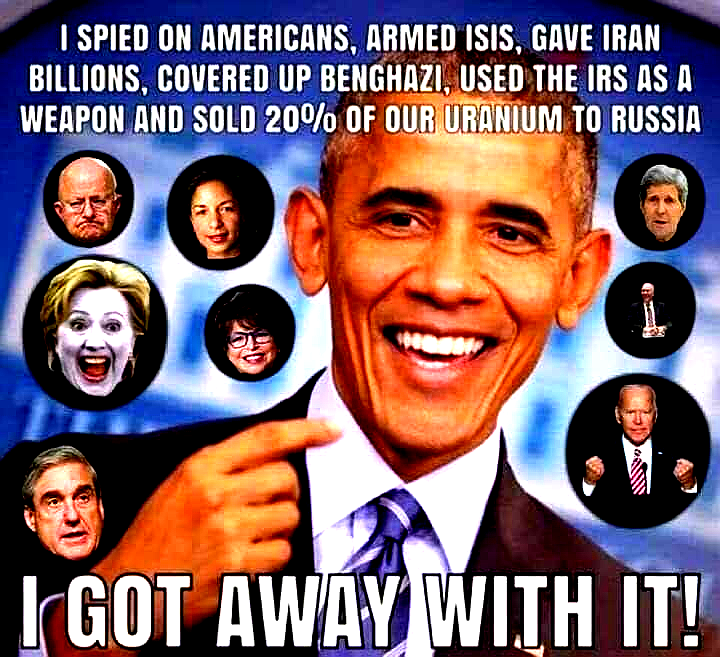

{'fake': 0.8023084998130798, 'real': 0.19769145548343658}

In [77]:
import os
img_dir = r'C:\Users\cvaal\PycharmProjects\FactAI\valid-imgs\fake'
ip = ImagePredictor()
res = ip.run(os.path.join(img_dir, '59444063_1318103115031918_2931813069308821504_n.jpg'))
res

In [68]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.ENGLISH, Language.TAGALOG]
detector = LanguageDetectorBuilder.from_languages(*languages).build()
pred = detector.detect_language_of("Aso nahuli at kinulong")
lang = 'en' if str(pred) == 'Language.ENGLISH' else 'tl' if str(pred) == 'Language.TAGALOG' else None
lang

'tl'